In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd    #89, 91, 92
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Preprocessing

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('nuovo_dataset_totale.csv')

# Filter the dataset based on the 'genre' column
filtered_df = dataset
filtered_df = filtered_df.drop(['id'], axis=1)

# Function to transform strings into lists of floats
def transform_to_list(lst_str):
    lst_str = lst_str.strip('][').split(', ')
    return [float(x) for x in lst_str]

# Apply the function to the 'popularity_artist' column
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(transform_to_list)

# Calculate the mean of each list
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean), 2)

# Define the target variables
y = filtered_df[['popularity']]

# Drop unnecessary columns from the feature matrix
X = filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number', 'album_type', 'album_release_date',
                      'album_release_date_precision', 'album_name', 'genre',
                      'popularity'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Normalize the feature matrix
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)


# MLRegressor

In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
# Initialize the DummyRegressor with different strategies
strategies = ['median']

for strategy in strategies:
    if strategy == 'median':
        dummy_regressor = DummyRegressor(strategy=strategy, constant=0)
    else:
        dummy_regressor = DummyRegressor(strategy=strategy)
    
    # Fit the DummyRegressor
    dummy_regressor.fit(X_train_norm, y_train)
    
    # Predict and evaluate
    y_pred = dummy_regressor.predict(X_test_norm)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Strategy: {strategy}, Mean Squared Error: {mse}, R2 Score: {dummy_regressor.score(X_test, y_test)}")


Strategy: median, Mean Squared Error: 524.6510306917087, R2 Score: -0.0003604906360632487


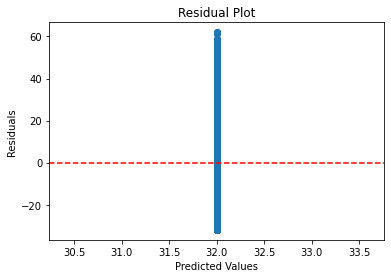

In [31]:
# Calculate residuals
residuals = np.array(y_test).squeeze() - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


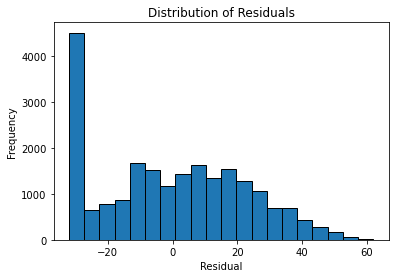

In [32]:
# Histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()